### Step‑by‑Step Guide to Simulating Quantum Systems with MarqSim

### Step 1: Prepare the quantum system of interest:

Export the Hamiltonian of the quantum system (e.g., using Qiskit Nature) and save it in the following format. Ensure that the file ends with a trailing newline. Save the file in the "Benchmark" folder and name it using the format "_Pauli_string_name", replacing "name" with the specific molecule or ion's name.

In [1]:
'''
+ 0.08638889570998813 * IIIIZIIZ
+ 0.1069695326633537 * IIIZIIIZ
+ 0.022758862478021794 * IIXXIIYY
+ 0.022758862478021794 * IIYYIIYY
'''

'\n+ 0.08638889570998813 * IIIIZIIZ\n+ 0.1069695326633537 * IIIZIIIZ\n+ 0.022758862478021794 * IIXXIIYY\n+ 0.022758862478021794 * IIYYIIYY\n'

we will use "Na+" as an example in this tutorial.

### Step 2: Specify the parameter of the simulation experiment

In [2]:
# Specify the transition matrix combinations to test.
# In this example, we evaluate three cases: P_qd, 0.4*P_qd+0.6*P_gc, and 0.4*P_qd+0.3*P_gc+0.3*P_rp
lam_list = [[1.0,0.0,0.0],[0.4,0.6,0.0],[0.4,0.3,0.3]]

# Specify the evolution time of the quantum system to be tested.
# In this example, we use t = π/12, which results in a shorter runtime on a classical computer.
execute_time = 0.26

# Specify the name of your file. The format is "Pauli_name", replacing "name" with the specific molecule or ion's name.
file_name = "Pauli_Na+"

# Specify the path where the data will be saved; ensure that this directory is created beforehand.
path_name = "Tutorial//Pauli_Na+"

# Specify the expected circuit error to be tested.
epsilon_list = [0.1,0.067,0.05,0.04,0.033,0.0286,0.025]

# Specify the number of samples for a given expected error and a specific transition matrix combination.
sampling_time = 20

### Step 3: Compilation

Execute the MarQSim compiler and retrieve the accuracy, as well as the CNOT and single-qubit gate counts for each sample.
This example only takes a few minutes to run.

In [3]:
from marqsim import *
acc_reses, CNOT_numses, single_q_numses, samples = operation(lam_list=lam_list, t=execute_time, file=file_name, path=path_name,
                                                    epsilon_list=epsilon_list, sampling_time=sampling_time)

Running lambda configuration: [1.0, 0.0, 0.0]
Total samples: 20
Sampling progress:


100%|██████████| 20/20 [00:29<00:00,  1.47s/it]


Running lambda configuration: [0.4, 0.6, 0.0]
Total samples: 20
Sampling progress:


100%|██████████| 20/20 [00:29<00:00,  1.47s/it]


Running lambda configuration: [0.4, 0.3, 0.3]
Total samples: 20
Sampling progress:


100%|██████████| 20/20 [00:29<00:00,  1.46s/it]


### Step 4: Data processing

For 'acc_reses,' 'CNOT_numses,' 'single_q_numses,' they should be interpreted in the same manner, we use acc_reses as an example. 'acc_reses[0]' is the sample accuracy from P_qd, 'acc_reses[1]' is the sample accuracy from 0.4P_qd+0.6P_gc, and 'acc_reses[2]' is the sample accuracy from 0.4P_qd+0.3P_gc+0.3P_rp. 'acc_reses[0]' itself is a list, it should be interpreted as 'acc_reses[0] = [first sample for epsilon_list, second sample for epsilon_list, ..., last sample for epsilon_list]'. Thus the length of this list is sampling_time*len(epsilon_list).

The samples represent the frequency of the sampled Hamiltonian terms. To obtain an exact sample—and thereby the exact circuit—the user can modify the operation function in marqsim.py, which is straightforward to do.

Now we start to plot the CNOT number vs the circuit accuracy for 3 different transition matrix combination.

In [4]:
# Clustering the CNOT, single qubit gate/total gate can be done similarly.
acc_clusters_1 = [drop_min_elements(acc_reses[0][i::7]) for i in range(7)]
acc_final_1 = np.array([sum(acc_clusters_1[i])/len(acc_clusters_1[i]) for i in range(len(acc_clusters_1))])
acc_std_1 = [np.std(acc_clusters_1[i]) for i in range(len(acc_clusters_1))]
CNOT_clusters_1 = np.array([sum(CNOT_numses[0][i::7])/len(CNOT_numses[0][i::7]) for i in range(7)])

acc_clusters_2 = [drop_min_elements(acc_reses[1][i::7]) for i in range(7)]
acc_final_2 = np.array([sum(acc_clusters_2[i])/len(acc_clusters_2[i]) for i in range(len(acc_clusters_2))])
acc_std_2 = [np.std(acc_clusters_2[i]) for i in range(len(acc_clusters_2))]
CNOT_clusters_2 = np.array([sum(CNOT_numses[1][i::7])/len(CNOT_numses[1][i::7]) for i in range(7)])

acc_clusters_3 = [drop_min_elements(acc_reses[2][i::7]) for i in range(7)]
acc_final_3 = np.array([sum(acc_clusters_3[i])/len(acc_clusters_3[i]) for i in range(len(acc_clusters_3))])
acc_std_3 = [np.std(acc_clusters_3[i]) for i in range(len(acc_clusters_3))]
CNOT_clusters_3 = np.array([sum(CNOT_numses[2][i::7])/len(CNOT_numses[2][i::7]) for i in range(7)])

In [5]:
# To ensure a fair comparison, we interpolate the clusters, and compare the reduction over a selected region defined by x_list.
x_list = np.array([0.992, 0.9925, 0.993, 0.9935, 0.994])
params1, _ = curve_fit(model_function, acc_final_1, CNOT_clusters_1)
a_fit1, b_fit1, c_fit1 = params1
params2, _ = curve_fit(model_function, acc_final_2, CNOT_clusters_2)
a_fit2, b_fit2, c_fit2 = params2
params3, _ = curve_fit(model_function, acc_final_3, CNOT_clusters_3)
a_fit3, b_fit3, c_fit3 = params3
y_fit_CNOT1 = model_function(x_list, a_fit1, b_fit1, c_fit1)
y_fit_CNOT2 = model_function(x_list, a_fit2, b_fit2, c_fit2)
y_fit_CNOT3 = model_function(x_list, a_fit3, b_fit3, c_fit3)
reduce12 = (sum(y_fit_CNOT1)-sum(y_fit_CNOT2))/sum(y_fit_CNOT1)
reduce13 = (sum(y_fit_CNOT1)-sum(y_fit_CNOT3))/sum(y_fit_CNOT1)
print("MarQSim-GC CNOT reduction:")
print("{:.3g}%".format(reduce12 * 100))
print("MarQSim-GC-RP CNOT reduction:")
print("{:.3g}%".format(reduce13 * 100))

MarQSim-GC CNOT reduction:
10.3%
MarQSim-GC-RP CNOT reduction:
18.8%


In [6]:
# Calculate the standard deviation reduction
reduce_std = (sum(acc_std_2)-sum(acc_std_3))/sum(acc_std_2)
print("MarQSim-GC-RP standard deviation reduction:")
print("{:.3g}%".format(reduce_std * 100))

MarQSim-GC-RP standard deviation reduction:
13.8%


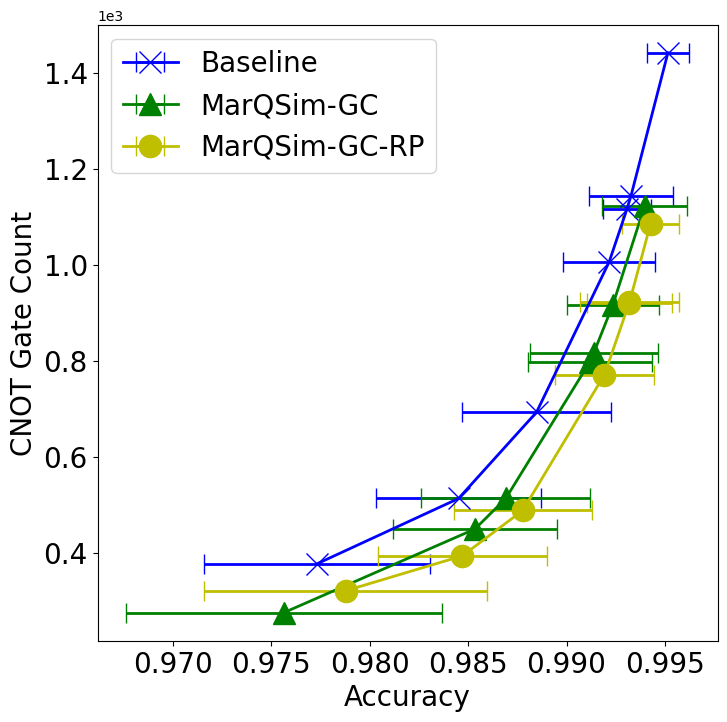

In [7]:
# Figure plot
params1, _ = curve_fit(model_function, acc_final_1, CNOT_clusters_1)
a_fit1, b_fit1, c_fit1 = params1
params2, _ = curve_fit(model_function, acc_final_2, CNOT_clusters_2)
a_fit2, b_fit2, c_fit2 = params2
params3, _ = curve_fit(model_function, acc_final_3, CNOT_clusters_3)
a_fit3, b_fit3, c_fit3 = params3
y_fit1 = model_function(acc_final_1, a_fit1, b_fit1, c_fit1)
y_fit2 = model_function(acc_final_2, a_fit2, b_fit2, c_fit2)
y_fit3 = model_function(acc_final_3, a_fit3, b_fit3, c_fit3)

plt.figure(figsize=(8, 8)) 
plt.errorbar(acc_final_1, y_fit1, xerr=acc_std_1, fmt='-x', markersize=16, capsize=7, label='Baseline', color='b', linewidth=2)
plt.errorbar(acc_final_2, y_fit2, xerr=acc_std_2, fmt='-^', markersize=16, capsize=7, label='MarQSim-GC', color='g', linewidth=2)
plt.errorbar(acc_final_3, y_fit3, xerr=acc_std_3, fmt='-o', markersize=16, capsize=7, label='MarQSim-GC-RP', color='y', linewidth=2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Accuracy', fontsize=20)
plt.ylabel('CNOT Gate Count', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.show()